In [1]:
import data_methods as dm
import matplotlib.pyplot as plt

from visualization_methods import VisualizationMethods as vm

dfs = dm.get_dataframes()
analysis = dm.get_metrics_analysis(
    dfs['2022-01'], 
    ['lcom', 'cbo', 'wmc', 'rfc'], 
    ['fanin', 'cbo', 'loc', 'rfc']
)

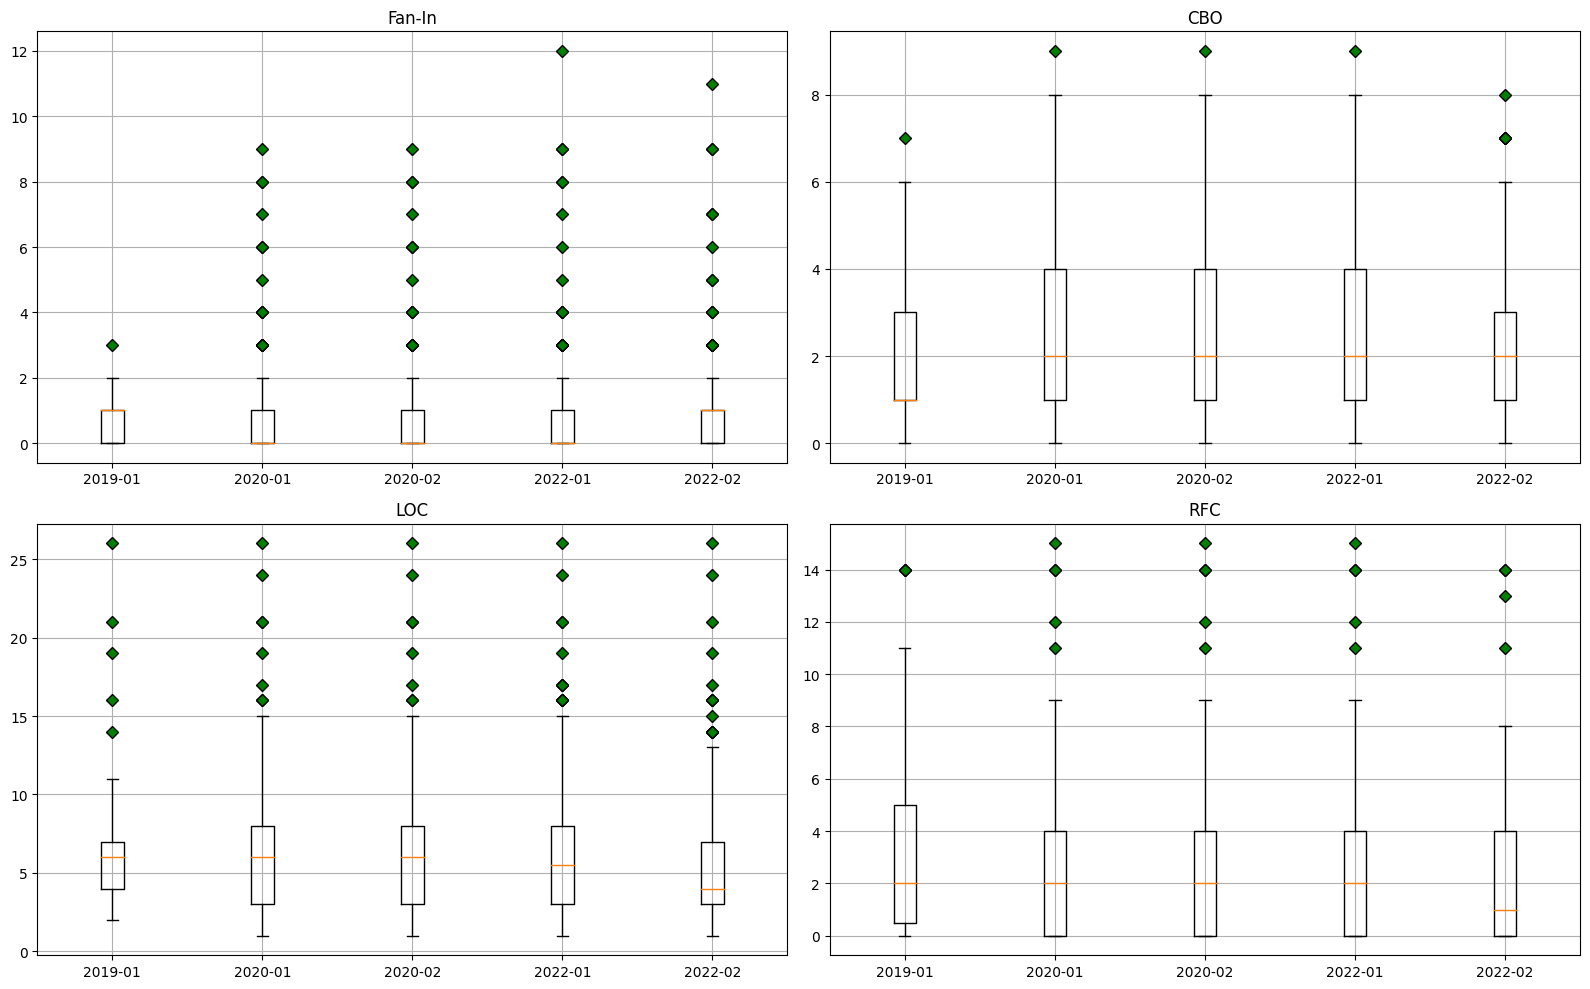

In [2]:
fig, rows = plt.subplots(2, 2, figsize=(16, 10))
fig.set_facecolor('white')

data_dict = {s:d['methods']['fanin'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][0], data_dict, 'Fan-In')

data_dict = {s:d['methods']['cbo'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[0][1], data_dict, 'CBO')

data_dict = {s:d['methods']['loc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][0], data_dict, 'LOC')

data_dict = {s:d['methods']['rfc'].values for s, d in dfs.items()}
vm.set_boxplots_by_ax(rows[1][1], data_dict, 'RFC')

plt.tight_layout()

In [3]:
top = 10
method_top_by_metric = dm.get_data_for_top_by_metric(analysis, 'method')
for metric, metric_content in method_top_by_metric.items():
    print('{} - AVG: {} - STDEV: {}'.format(
        metric.upper(), metric_content['avg'], metric_content['stdev']
    ))
    print('Top-{} methods with high {}:'.format(top, metric.upper()))
    for r in metric_content['records']:
        print('{} - {}: {}'.format(r[0], r[1], r[2]))
    print('\n')

CBO - AVG: 2.313953488372093 - STDEV: 2.1553698646985446
Top-10 methods with high CBO:
br.ufmg.engsoft.reprova.routes.api.Score - post: 9
br.ufmg.engsoft.reprova.tests.mime.json.JsonTest - testQuestionSerialization_FineGrained: 8
br.ufmg.engsoft.reprova.tests.model.CourseTest - testCreateWithoutStudentsFromBufferedReader: 8
br.ufmg.engsoft.reprova.tests.model.CourseTest - testCreateWithStudents: 8
br.ufmg.engsoft.reprova.tests.model.CourseTest - testCreateWithoutStudents: 8
br.ufmg.engsoft.reprova.tests.database.FineGrainedCourseDAOTest - test_insertion: 7
br.ufmg.engsoft.reprova.tests.database.FineGrainedCourseDAOTest - test_retrieval: 7
br.ufmg.engsoft.reprova.routes.api.Questions - post: 7
br.ufmg.engsoft.reprova.tests.mime.json.JsonTest - testCourseSerialization_FineGrained: 7
br.ufmg.engsoft.reprova.tests.mime.json.JsonTest - testQuestionSerialization_CoarseGrained: 7


RFC - AVG: 2.691860465116279 - STDEV: 3.1277718912647434
Top-10 methods with high RFC:
br.ufmg.engsoft.reprova.t